In [2]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
#Seaborn
import seaborn
print('seaborn: {}'.format(seaborn.__version__))

import plotly
print('plotly: {}'.format(seaborn.__version__))

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords

import sys,os,os.path
os.environ['HTTP_PROXY']=""
os.environ['HTTPS_PROXY']=""


Python: 3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
scipy: 0.18.1
numpy: 1.11.3
matplotlib: 2.0.0
pandas: 0.19.2
sklearn: 0.18.1
seaborn: 0.7.1
plotly: 0.7.1


In [33]:
# Load libraries
import pandas as pd
import bokeh
import wordcloud
import matplotlib
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sb

In [34]:
dataset_1 = pd.read_csv('random_user_info.csv')
dataset_2 = pd.read_csv('users_repos_info.csv',index_col='id')

In [35]:
dataset_1 = dataset_1.drop_duplicates(keep='first')
dataset_2 = dataset_2.drop_duplicates(keep='first')

In [36]:
dataset_1=dataset_1.rename(columns={'id':'owners_id'})

In [37]:
list_lan=list(dataset_2.language)

In [38]:
list_lan=str(list_lan)

# Word Cloud which shows widely used languages.

In [21]:
def wordcloud(text,in_file,out_file,color,max_words):
    from os import path
    from PIL import Image
    import numpy as np
    import matplotlib.pyplot as plt

    from wordcloud import WordCloud, STOPWORDS

    d = path.dirname(".")

# Read the whole text.
#text = open(path.join(d, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
    github_lan = np.array(Image.open(path.join(d, in_file)))

    stopwords = set(STOPWORDS)
    stopwords.add('nan')
    stopwords.add("JavaScript")
    stopwords.add("Ruby")
    stopwords.add("Python'")
    stopwords.add("Python")
    stopwords.add("Java")
    stopwords.add("PHP")
    stopwords.add("PHP'")
    stopwords.add("C")
    stopwords.add("C++")

    
#stopwords.add('"')

    wc = WordCloud(background_color=color,max_words=max_words, mask=github_lan,stopwords=stopwords,height=50,width=50)
# generate word cloud
    wc.generate(text)

# store to file
    wc.to_file(path.join(d, out_file))

# show
    plt.imshow(wc)
    plt.axis("off")
#plt.figure(num=None,figsize=(50, 50), dpi=160, )
    plt.figure(figsize=(150,150))
#x = [1,2,3]
#plt.plot(x, x)
#plt.show()
#plt.imshow(github_lan, cmap=plt.cm.gray)
#plt.axis("off")
    return(plt.show())

    

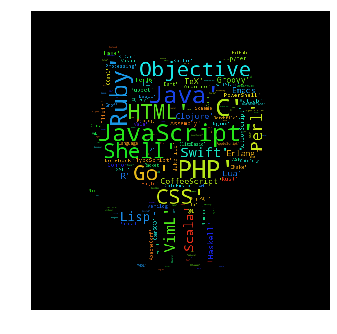

In [175]:
wordcloud(list_lan,"github-logo","Frequent_Languages_WC.png")

# Exploring the Languages and enumerating them using visualizations.

In [39]:
Frequent_Languages = pd.DataFrame(dataset_2['language'].value_counts())
Frequent_Languages=Frequent_Languages.reset_index()
Frequent_Languages=Frequent_Languages.rename(columns={'index':'language','language':'counts'})
Frequent_Languages

language  counts
0          JavaScript    4762
1                Ruby    2665
2              Python    2322
3                Java    1987
4                 PHP    1735
5                   C     942
6                 C++     820
7         Objective-C     788
8               Shell     787
9                  C#     650
10                CSS     643
11               HTML     582
12                 Go     480
13               Perl     252
14               VimL     209
15              Swift     187
16              Scala     165
17       CoffeeScript     161
18         Emacs Lisp     152
19            Clojure     128
20            Haskell     113
21             Erlang     101
22                TeX      92
23                Lua      86
24             Groovy      84
25                  R      78
26       ActionScript      76
27         TypeScript      69
28            Arduino      53
29             Elixir      41
..                ...     ...
116  Component Pascal       1
117            Zephir       1
118                M4       1
119               Awk       1
120              Yacc       1
121             Terra       1
122           Mercury       1
123         Pure Data       1
124            DTrace       1
125             Smali       1
126             ANTLR       1
127                Hy       1
128                DM       1
129               GAP       1
130               Lex       1
131          LilyPond       1
132              Pony       1
133            Jasmin       1
134               SQF       1
135              Lean       1
136              Hack       1
137       Objective-J       1
138            Smarty       1
139        Inno Setup       1
140              LLVM       1
141               SQL       1
142         REALbasic       1
143          CartoCSS       1
144              GLSL       1
145               XML       1

[146 rows x 2 columns]

In [40]:

import plotly.plotly as py
import cufflinks as cf
import pandas as pd

#plotly.tools.set_credentials_file(username='qwerty03', api_key='zalzm7bui9') 
#plotly.offline.init_notebook_mode()
cf.set_config_file(offline=True, world_readable=True, theme='ggplot')




series = dataset_2['language'].value_counts()[:20]
series.head(3)

series.iplot(kind='bar',yTitle='Counts of Repositories on a particular language',xTitle='Languages',theme='polar',filename="Frequent_Languages")
#help(pd.DataFrame.iplot)


# Most Frequent Technologies using Java Script

In [12]:
js_desc = dataset_2[dataset_2['language']=='JavaScript']

In [13]:
js_lan=str(list(js_desc.description))

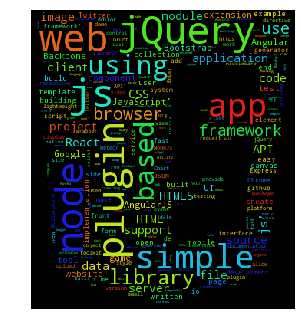

In [20]:
wordcloud(js_lan,"learn-javascript.png","Frequent_Projects_JS_WC.png","black")

# Most Frequent Technologies using Ruby

In [86]:
ruby_desc= dataset_2[dataset_2['language']=='Ruby']

In [87]:
ruby_lan=str(list(ruby_desc.description))

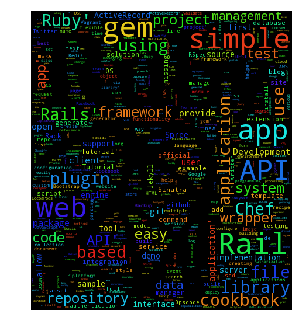

In [197]:
wordcloud(ruby_lan,"ruby.png","Frequent_Projects_Ruby_WC.png")

# Most Frequent Technologies using Python

In [53]:
py_desc = dataset_2[dataset_2['language']=='Python']

In [54]:
py_lan=str(list(py_desc.description))

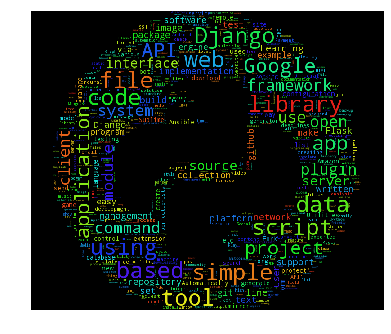

In [55]:
wordcloud(py_lan,"python.jpeg","Frequent_Projects_Python_WC.png","black",10000)

# Most Frequent Technologies using Java

In [23]:
java_desc = dataset_2[dataset_2['language']=='Java']

In [24]:
java_lan=str(list(java_desc.description))

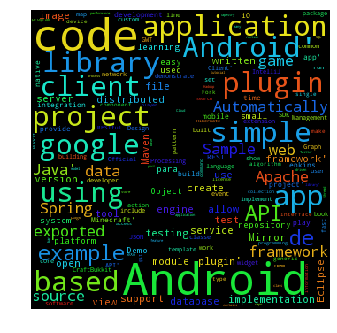

In [34]:
wordcloud(java_lan,"java.jpg","Frequent_Projects_Java_WC.png",'black', 2000)

# Most Frequent Technologies using PHP

In [36]:
php_desc = dataset_2[dataset_2['language']=='PHP']

In [37]:
php_lan=str(list(php_desc.description))

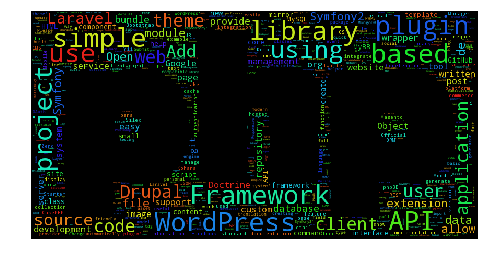

In [39]:
wordcloud(php_lan,"ph.png","Frequent_Projects_PHP_WC.png","Black",1000)

# Most Frequent Technologies using C

In [134]:
C_desc = dataset_2[dataset_2['language']=='C']

In [135]:
c_lan=str(list(C_desc.description))

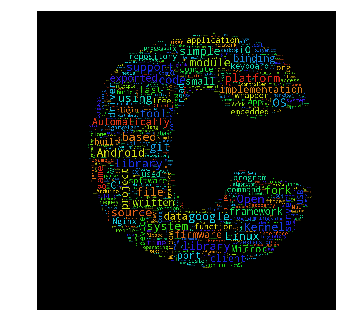

In [199]:
wordcloud(c_lan,"C.png","Frequent_Projects_C_WC.png")

# Most Frequent Technologies using C++

In [41]:
C_pls_desc = dataset_2[dataset_2['language']=='C++']

In [42]:
C_pls_lan=str(list(C_pls_desc.description))

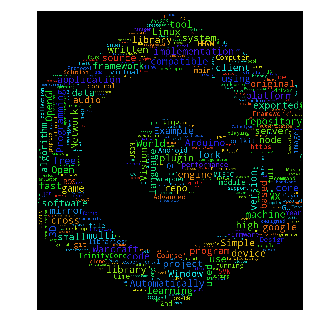

In [52]:
wordcloud(C_pls_lan,"cpp.png","Frequent_Projects_Cpls_WC.png","black",350)

# Most Frequent Technologies using Objective C

In [72]:
obj_C_desc = dataset_2[dataset_2['language']=='Objective-C']

In [73]:
obj_C_lan=str(list(obj_C_desc.description))

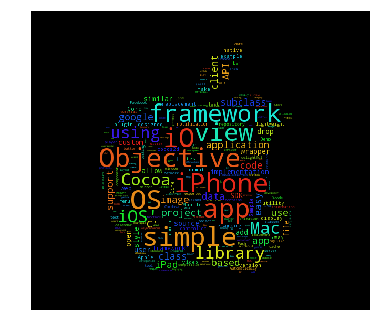

In [228]:
wordcloud(obj_C_lan,"apple.png","Frequent_Projects_obj_C_WC.png","black")